## Top Ten Most Frequent Words in Star Trek the Next Generation
The following script finds the ten most frequent words in Start Trek the Next Generation either the whole series, a whole season, or a single episode. Many times top ten analyses are used to find the top ten words overall, but this particular script strips out stopwords so the resulting top ten words shed light on the top ten thematic words.

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (RED)](https://kb.iu.edu/d/apum). You will also need to have access to RED through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](textPrep-Py.ipynb) before you proceed further. The textPrep-Py notebook provides information and resources on how to get a Carbonate account, how to set up RED, and how to get started using the Jupyter Notebook on RED.     

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In your terminal, packages can be installed by simply typing "pip install nameofpackage --user" (minus the quotes). 


- **nltk:** Platform for building Python programs to work with human language data.

- **os:** This module provides a portable way of using operating system dependent functionality.

- **string:** contains a number of useful constants and classes, as well as some deprecated legacy functions that are also available as methods on strings.

- **collections:** Implements specialized container datatypes providing alternatives to Python's general purpose built-in containers: dict, list, set, and tuple.

- **operator:** Exports a set of functions corresponding to the intrinsic operators of Python.

- **matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

- **numpy:** The fundamental package for scientific computing with Python.

- **re:** Provides regular expression matching operations similar to those found in Perl.

- **math:** Provides access to the mathematical functions defined by the C standard.


In [1]:
from nltk.corpus import stopwords
import os
import string
from collections import defaultdict
import operator
import matplotlib.pyplot as plt
import numpy as np
import re
import math

### Stopwords
Here we save the nltk stopwords list as the variable 'stop_words' (minus the quotes). If you need a different language, simply change 'english' (keep the quotes) to the anglicized name of the language you wish to use (e.g. 'spanish' instead of 'espanol' or 'german' instead of 'deutsch'). If you wish to add additional words to the stop_words variable, add the word in quotes to the list in stop_words.extend(['the', 'words', 'you', 'want', 'to', 'add']). 

In [2]:
stop_words = stopwords.words('english')
stop_words.extend(['good','come', 'would'])

### Functions
We need to create a few functions in order to calculate and plot the ten most frequent words.Any time you see 'def' (without the quotes) the means we are DEclaring a Function. The 'def' is usually followed by the name of the function being created and then in parentheses are the arguments the function requires. After the parentheses is a colon, which closes the declaration, then a bunch of code below which is indented. The indented code is the program statement or statements to be executed or in other words what the function is doing. Once you have created your function all you need to do in order to run it is call the function by name and make sure you have included all the required arguments in the parentheses. This allows you to do what the function does without having to write out all the code in the function every time you wish to perform that task.

#### Text Cleaning
The first function does some text cleaning for us and requires the text being cleaned and whether or not there is a stopword list for arguments. Now come the statements to be executed. First we lowercase the text or else 'Love' and 'love' will be counted as two different words, so we make them all 'love'. Then we split the text into individual words and remove empty spaces. Then we remove any digits, stopwords, and punctuation and return a list of cleaned words.

In [3]:
def textClean(text, stopWordsList = None):
    
    text = text.strip().lower()
    
    tokens = re.split(r'\W+', text)
    
    # remove empty string
    tokens = [t for t in tokens if t]
    
    # remove digits
    tokens = [t for t in tokens if not t.isdigit()]
    
    # built-in stop words list
    tokens = [t for t in tokens if t not in stop_words]
    
    # custom stop words list
    if stopWordsList is not None:
        tokens = [t for t in tokens if t not in stopWordsList]
        
    # remove punctuation
    puncts = list(string.punctuation)
    puncts.append('--')

    tokens = [t for t in tokens if t not in puncts]

    return tokens

#### Frequency count

Now we need a function to count all the words and put them in order from most frequent to least frequent. The first four lines say that we are creating a function that creates a dictionary that adds '1' next to a word in that dictionary every time that word is used. The last line says that we are sorting that dictionary from the highest number to the lowest number.

In [4]:
"""
Get sorted frequency in descending order
"""
def getFreq(tokens):
    
    freq = defaultdict(int)

    for t in tokens:
        freq[t] += 1
    
    # sorted frequency in descending order
    return sorted(freq.items(), key = operator.itemgetter(1), reverse = True)

#### Plot Graph

This next function describes how we want to plot or visualize our results. We name this function 'plotTopTen' and it begins by pulling only the top ten words from our sorted frequency above and printing them in a list. Then it says we want a barplot (plt.bar) and the rest describes different aspects of the barplot, such as what we want for the x and y axis, the centering of the graph, the colors of the bars, the labels and titles of the graph, and how to save a .png file of the visualization so we can use it in future presentations or publications.

In [5]:
def plotTopTen(sortedFreq, title, fontParas, imgFilepath, dpi):
    
    topn = 15

    for t in sortedFreq[0 : topn]:
        
        print('{} : {}'.format(t[0], t[1]))
    
    topNWords = [w for w in sortedFreq[0 : topn]]

    x_pos = np.arange(len(topNWords))
    cnts = [w[1] for w in topNWords]

    plt.rcdefaults()

    plt.bar(x_pos, cnts, align = 'center', alpha = 0.5, color = ['red', 
                                                             'orange', 'yellow', 'green', 'blue',
                                                             'darkorchid', 'darkred', 'darkorange', 
                                                             'gold', 'darkgreen'])
    
    for k in fontParas:
        plt.rcParams[k] = fontParas[k]
        
    plt.xticks(x_pos, [w[0] for w in topNWords])
    plt.xticks(rotation = 45)
        
    xlabel = plt.xlabel('Words')
    xlabel.set_color('red')
    ylabel = plt.ylabel('Frequency')
    ylabel.set_color('red')
    
    high = max(cnts)
    low = 0
    
    plt.ylim(low, math.ceil(high + 0.1 * (high - low)))
    
    for xpos, count in zip(x_pos, cnts):
    
        plt.text(x = xpos, y = count + 1, s = str(count), ha = 'center', va = 'bottom')

    plt.title(title)
 
    plt.savefig(imgFilepath, format = 'png', dpi = dpi, bbox_inches = 'tight')
    
    plt.show()

#### Pull from a single file

This function reads a single file from which we will be counting and ploting the top ten words. This function opens the file, reads it, then applies the cleaning function we created above and adds the ability to include an additional stopword list if needed.

In [6]:
def getTokensFromSingleText(textFilepath, stopWordsList):
    
    with open(textFilepath, "r") as f:
        text = f.read()

    return textClean(text, stopWordsList)

#### Pull from a directory

This function is similar to the one above that reads a single text, except this one reads every file in a directory and applies the text cleaning function to all of them. It also lets you know when it has finished the process with each file in your directory.

In [7]:
def getTokensFromScan(corpusRoot, stopWordsList):
    
    tokens = []
    
    for root, subdirs, files in os.walk(corpusRoot):
        
        for filename in files:
            
            # skip hidden file
            if filename.startswith('.'):
                continue
            
            textFilepath = os.path.join(root, filename)
            
            with open(textFilepath, "r") as f:
                text = f.read()
                tokens.extend(textClean(text, stopWordsList))
                
                print('Finished tokenizing text {}\n'.format(textFilepath))
    
    return tokens

### File paths and additional stopwords

Now we need to point to the directories we will be using. This includes a directory that houses a file with additional stopwords to add to the one from the nltk package we used in our cleaning script above. 

This is where you will most likely be making changes. You will need to change the file paths to match the ones on your Carbonate account or computer. The first one 'dataHome' we use to point to our additional stopwords file. The second one 'corpusRoot' points to the directory where our data file or files are located.

Then we have to point to the additional stopwords file and read it and lowercase all the words in the list and save the final opened and lowercased list of stopwords as a variable to use later.

In [8]:
# load custom stop words list

dataHome = '/N/u/klosteda/Carbonate/Text-Analysis/data'

corpusRoot = os.path.join(dataHome, 'StarTrekNextGenClean/season1')

stopWordsFilepath = os.path.join(dataHome, 'nltkStopword.txt')

with open(stopWordsFilepath, "r") as f:
    stopWordsList = f.readlines()
            
stopWordsList = [w.strip().lower() for w in stopWordsList]

### Top ten from a single file
The script in the box below now uses the functions and file paths we have created to get the top ten words from a single .txt file. We start by pointing to the specific file, then we use the getTokensFromSingleText function we created above to clean the text and split the text into individual words. Then we get the word frequency of the text. Finally, we add some additional aesthetics and information for the visualization including the title of the graph, the font for the graph labels, and the dpi setting for the graph. Then we implement the plotting function we created above to give us a bar plot of the top ten words in our chosen text.

sir : 172
captain : 86
us : 44
yes : 35
commander : 32
riker : 31
station : 23
know : 23
enterprise : 22
like : 22
farpoint : 21
one : 21
ship : 20
something : 20
mister : 19


/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


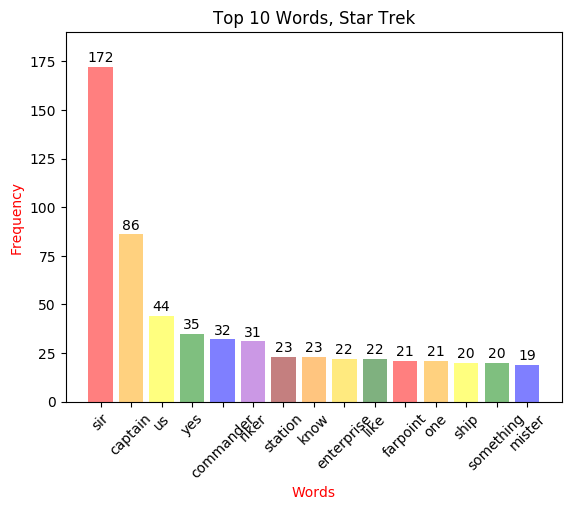

In [9]:
# Use case one, analyze top 10 most frequent words from a single text

textFilepath = os.path.join(corpusRoot, '102.txt')

# get tokens
tokens = getTokensFromSingleText(textFilepath, stopWordsList)

# get frequency
freq = getFreq(tokens)

title = 'Top 10 Words, Star Trek'

# a dictionary that specifies font related parameters as key-value pairs

fontParas = {'font.sans-serif' : 'Arial', 'font.family' : 'sans-serif'}

imgFilepath = '/N/u/klosteda/Carbonate/Text-Analysis/Output/starTrek102TopTenPlainText.png'

dpi = 300

plotTopTen(freq, title, fontParas, imgFilepath, dpi)


### Top ten from a directory
This last box gives a script which is similar to the one for a single text file, except this uses the function we created for reading an entire directory. This allows us to get the top ten words for an entire body of work, such as all of Shakespeare's plays or the scripts for all seven seasons of Star Trek: The Next Generation.

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/102.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/103.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/104.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/105.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/106.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/107.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/108.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/109.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/110.txt

Finished tokenizing text /N/u/klosteda/Carbona

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))



commander : 239
something : 239
could : 237
lieutenant : 230
doctor : 228


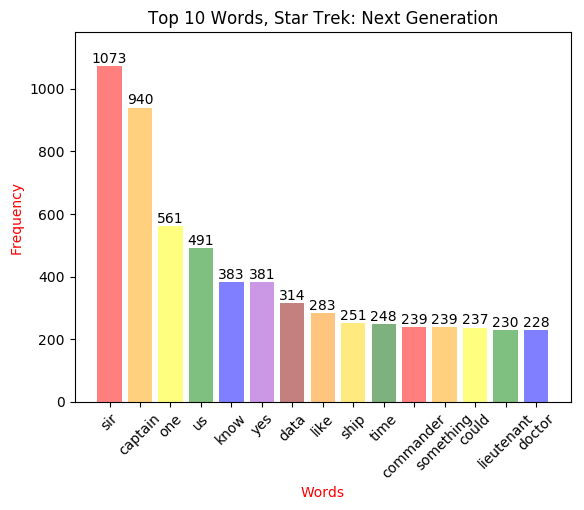

In [11]:
# Use case two, analyze top 10 most frequent words from a corpus root

tokens = getTokensFromScan(corpusRoot, stopWordsList)

# get frequency
freq = getFreq(tokens)

title = 'Top 10 Words, Star Trek: Next Generation'

# a dictionary that specifies font related parameters as key-value pairs

fontParas = {'font.sans-serif' : 'Arial', 'font.family' : 'sans-serif'}

imgFilepath = '/N/u/klosteda/Carbonate/Text-Analysis/Output/starTrekTopTenPlainText.png'

dpi = 300

plotTopTen(freq, title, fontParas, imgFilepath, dpi)